
**Assignment for Data Scientist/Data Engineer**


You have been tasked with creating a new assistive technology that can identify the class of health condition described in a given patient description.



The technology should assist doctors as they review many such descriptions each day during their hospital rounds, and help them quickly identify key information about a patient's condition.



The dataset provided to you contains descriptions of 5 different health conditions: those related to

**1 the digestive system**

**2 cardiovascular system**

**3 neoplasms**

**4 nervous system**

**5 general pathological conditions.**

There are a total of 14438 records in the dataset, which is presented as text.

```
To complete this assignment, you will need to:

● Split the dataset into training and test sets as appropriate.

● Perform exploratory data analysis on the data.

● Build a text classification model based on the dataset

● Monitor relevant evaluation metrics while training the model

● Present any interesting or important findings from the exploratory data analysis.

● Save the trained model, and make it available through an API (using either Flask or FastAPI).

● Dockerize the API.

● Host a local RabbitMQ message queue server, and send data for inference through the message queue.

● Create a RabbitMQ Consumer that consumes data from the queue and makes an API call for model inference.

● Save the inference results, along with the text on which model inference was made, in a Postgres/SQLite/MySQL Database (which can be locally hosted on your machine).
```






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/data.dat'

with open(file_path, 'r') as file:
    content = file.read()

print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd

# Replace 'your_file_name.dat' with the actual name of your .dat file
file_path = '/content/drive/My Drive/data.dat'

# Initialize empty lists to store the data
numbers = []
descriptions = []

# Read the data from the .dat file line by line
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespaces
        number, description = line.split('\t', 1)  # Split using tab as delimiter, max split 1 time
        numbers.append(number)
        descriptions.append(description)

# Create a DataFrame with 'number' and 'description' columns
df = pd.DataFrame({'disease': numbers, 'description': descriptions})

In [ ]:
df

,disease,description
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...
...,...,...
14433,4,Quadricuspid aortic valve and aortic regurgita...
14434,1,Mammographic measurements before and after aug...
14435,1,Use of leukocyte-depleted platelet concentrate...
14436,2,Complications of Tenckhoff catheters post remo...


### Split the dataset into training and test sets as appropriate.


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and test sets
X_train_desc, X_test_desc, y_train_disease, y_test_disease = train_test_split(df['description'], df['disease'], test_size=0.2, random_state=42)


X_train_desc

3680     The unique aspects of acute promyelocytic leuk...
2238     Prediction of variceal hemorrhage in cirrhosis...
10427    Neutrophil function and pyogenic infections in...
12939    The prognostic value of image analysis in ovar...
5044     Congenital monomelic hypertrophy with progress...
                               ...                        
5191     Gastric infarction. We have described a patien...
13418    Indications for distal arterial reconstruction...
5390     Intraperitoneal femoral venous catheter insert...
860      Left and right ventricular flows by Doppler ec...
7270     Mallory-Weiss syndrome after cardiopulmonary r...
Name: description, Length: 11550, dtype: object

In [ ]:
y_train_disease


3680     1
2238     5
10427    5
12939    1
5044     5
        ..
5191     4
13418    4
5390     2
860      4
7270     2
Name: disease, Length: 11550, dtype: object

Performing EDA


Visualize the distribution of diseases using a bar plot.

Count the occurrences of each disease in the dataset.

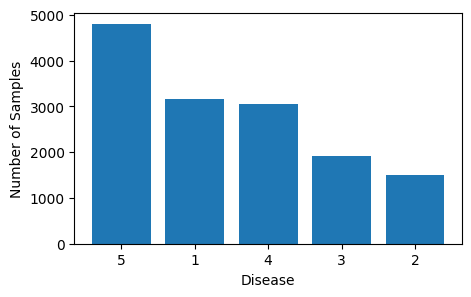

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each disease
disease_counts = df['disease'].value_counts()

#ploat the distrubtion
plt.figure(figsize=(5,3))
plt.bar(disease_counts.index, disease_counts.values)
plt.xlabel('Disease')
plt.ylabel('Number of Samples')
plt.show()



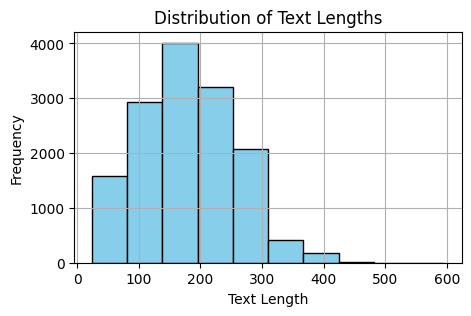

In [ ]:


# Calculate the length of each description (choose word count or character count)
text_lengths = [len(description.split()) for description in descriptions]  # Word count
# text_lengths = [len(description) for description in descriptions]  # Character count

# Create a histogram
plt.figure(figsize=(5, 3))
plt.hist(text_lengths, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



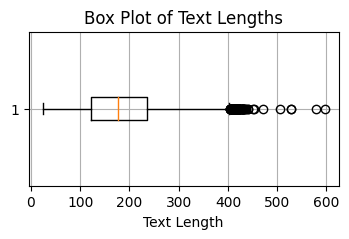

In [ ]:
# Create a box plot
plt.figure(figsize=(4, 2))
plt.boxplot(text_lengths, vert=False)
plt.title("Box Plot of Text Lengths")
plt.xlabel("Text Length")
plt.grid(True)
plt.show()

**Convert all text to lowercase: This ensures that the model treats uppercase and lowercase words equally.**

In [ ]:
# I can help you with that! Here's the code for each of the tasks you mentioned:

# 1. Perform Exploratory Data Analysis (EDA):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14438 entries, 0 to 14437
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   disease      14438 non-null  object
 1   description  14438 non-null  object
dtypes: object(2)
memory usage: 225.7+ KB
None
       disease                                        description
count    14438                                              14438
unique       5                                              11227
top          5  Acute autonomic neuropathy. Two cases and a cl...
freq      4805                                                  4


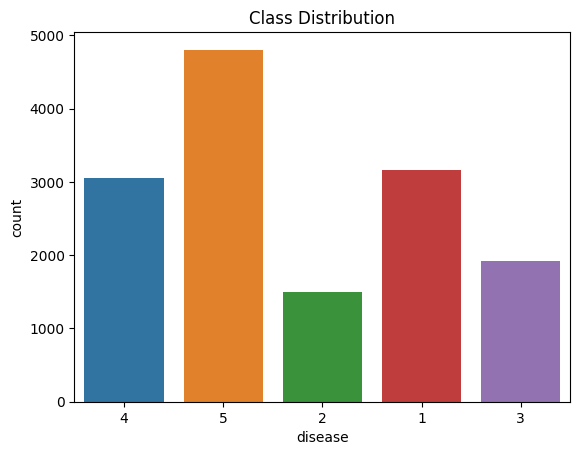

In [ ]:

# Visualize class distribution
sns.countplot(x='disease', data=df)
plt.title('Class Distribution')
plt.show()


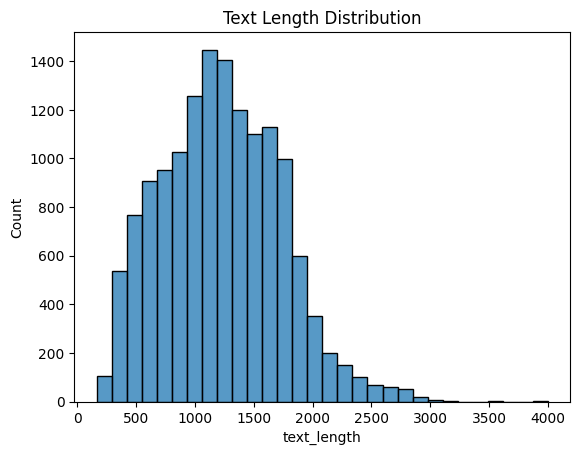

In [ ]:

# Visualize text length distribution
df['text_length'] = df['description'].apply(len)
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Text Length Distribution')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming 'df' is your DataFrame containing 'description' and 'disease' columns

# Split the data
X_train_desc, X_val_desc, y_train_disease, y_val_disease = train_test_split(df['description'], df['disease'], test_size=0.2, random_state=42)
# Further split 'X_val_desc' into validation and test sets if needed

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_desc)
X_val_tfidf = tfidf_vectorizer.transform(X_val_desc)
# You can also transform X_test_desc similarly

# Train a text classification model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train_disease)

# Make predictions on the validation set
val_pred = model.predict(X_val_tfidf)

# Evaluate the model on the validation set
print(classification_report(y_val_disease, val_pred))




              precision    recall  f1-score   support

           1       0.71      0.78      0.74       647
           2       0.58      0.25      0.35       315
           3       0.58      0.35      0.44       370
           4       0.69      0.73      0.71       621
           5       0.48      0.59      0.53       935

    accuracy                           0.60      2888
   macro avg       0.61      0.54      0.55      2888
weighted avg       0.60      0.60      0.58      2888



In [ ]:


# Monitoring Evaluation Metrics during Training
num_epochs = 4
for epoch in range(num_epochs):
    # Training code here

    # Make predictions on the validation set
    val_pred = model.predict(X_val_tfidf)

    # Calculate evaluation metrics
    val_accuracy = accuracy_score(y_val_disease, val_pred)
    val_precision = precision_score(y_val_disease, val_pred, average='weighted')
    val_recall = recall_score(y_val_disease, val_pred, average='weighted')
    val_f1 = f1_score(y_val_disease, val_pred, average='weighted')

    # Print or log the metrics for monitoring
    print(f'Epoch {epoch+1}: Val Acc: {val_accuracy:.4f}, Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}')

NameError: ignored

In [ ]:
!pip install allennlp

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from allennlp.modules.elmo import Elmo, batch_to_ids

# Assuming 'df' is your DataFrame containing 'description' and 'disease' columns

# Split the data
X_train_desc, X_val_desc, y_train_disease, y_val_disease = train_test_split(df['description'], df['disease'], test_size=0.2, random_state=42)
# Further split 'X_val_desc' into validation and test sets if needed

# Load pre-trained ELMo model
options_file = "path_to_options_file"  # Path to your ELMo options file
weight_file = "path_to_weight_file"    # Path to your ELMo weight file
elmo = Elmo(options_file, weight_file, 1, dropout=0)

# Convert text to ELMo embeddings
def get_elmo_embeddings(texts):
    character_ids = batch_to_ids(texts)
    embeddings = elmo(character_ids)
    return embeddings['elmo_representations'][0]  # Using the first layer

X_train_elmo = get_elmo_embeddings(X_train_desc)
X_val_elmo = get_elmo_embeddings(X_val_desc)
# You can also get embeddings for X_test_desc similarly

# Define a simple neural network for classification
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convert embeddings to PyTorch tensors
X_train_tensors = torch.tensor(X_train_elmo)
X_val_tensors = torch.tensor(X_val_elmo)

# Define model parameters
input_dim = X_train_tensors.shape[1]
hidden_dim = 128
output_dim = len(df['disease'].unique())  # Number of unique disease classes

# Initialize the model
model = TextClassifier(input_dim, hidden_dim, output_dim)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensors)
    loss = criterion(outputs, y_train_disease)
    loss.backward()
    optimizer.step()

# Make predictions on the validation set
model.eval()
with torch.no_grad():
    val_pred = model(X_val_tensors).argmax(dim=1)

# Convert predictions back to numpy array
val_pred = val_pred.numpy()

# Evaluate the model on the validation set
print(classification_report(y_val_disease, val_pred))

FileNotFoundError: ignored

In [ ]:

pip install transformers

In [ ]:

# Then, you can modify your code as follows:

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertModel

# Assuming 'df' is your DataFrame containing 'description' and 'disease' columns

# Split the data
X_train_desc, X_val_desc, y_train_disease, y_val_disease = train_test_split(df['description'], df['disease'], test_size=0.2, random_state=42)
# Further split 'X_val_desc' into validation and test sets if needed

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

# Convert text to BERT embeddings
def get_bert_embeddings(texts):
    input_ids = tokenizer.batch_encode_plus(texts, padding=True, truncation=True, return_tensors='pt')['input_ids']
    embeddings = bert_model(input_ids)[0]  # Last-layer hidden states
    return embeddings

X_train_bert = get_bert_embeddings(X_train_desc)
X_val_bert = get_bert_embeddings(X_val_desc)
# You can also get embeddings for X_test_desc similarly

# Define a simple neural network for classification
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convert embeddings to PyTorch tensors
X_train_tensors = X_train_bert
X_val_tensors = X_val_bert

# Define model parameters
input_dim = X_train_tensors.shape[1]
hidden_dim = 128
output_dim = len(df['disease'].unique())  # Number of unique disease classes

# Initialize the model
model = TextClassifier(input_dim, hidden_dim, output_dim)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensors)
    loss = criterion(outputs, y_train_disease)
    loss.backward()
    optimizer.step()

# Make predictions on the validation set
model.eval()
with torch.no_grad():
    val_pred = model(X_val_tensors).argmax(dim=1)

# Convert predictions back to numpy array
val_pred = val_pred.numpy()

# Evaluate the model on the validation set
print(classification_report(y_val_disease, val_pred))

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
